# GENERATING "productionchangeover.dat" file for PRODUCTION CHANGEOVER

In [171]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [172]:
# Auxiliary Functions 
def tuple_builder(input_np_array):
    string_repr = str(input_np_array.tolist())[1:-1]
    return_string = "<" + string_repr + ">"
    return return_string


In [208]:
# Input global parameters 
num_products = 12
num_factories = 5
num_periods = 52

In [209]:
# Generate Products, Factories, and Periods
#Products = {1, 2, 3, 4, 5, 6, 7};
#Factories = {1, 2, 3, 4, 5};
#Periods = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30};
def basic_data_input(string_input, total_num):
    return_string = string_input + " = {" 
    for i in range(total_num):
        if i > 0:
            internal_string = str(i) + ", "
            return_string += internal_string
    return_string += str(total_num) + "};"
    print(return_string)


In [210]:
def beginning_params(num_factories=num_factories, num_periods = num_periods, num_products=num_products):
    basic_data_input("Products", num_products)
    basic_data_input("Factories", num_factories)
    basic_data_input("Periods", num_periods)
    print("num_factories" + " = " + str(num_factories) + ";")
    print("num_products" + " = " + str(num_products) + ";")
    print("num_periods" + " = " + str(num_periods) + ";")


SINGLE PARAMETER GENERATORS (total_area and max_line_changes)

In [211]:
#single parameters for total_area and max_line_changes 
def total_area(num_factories=num_factories, median_area = 5000000):
    return_array= np.random.randint(0.5*median_area,1.5*median_area,size=(num_factories))
    print("total_area =", return_array, ";")
def max_line_changes(num_factories=num_factories, num_periods=num_periods, median_line_changes=15):
    #matrix shape is factories by periods t
    return_array = np.random.randint(0.75*median_line_changes, 1.25*median_line_changes,size=(num_factories, num_periods))
    print("max_line_changes =", return_array, ";")



TUPLE PARAMETER GENERATORS (ProductFactoryData, ProductTimeData, ProductProductFactoryData)

In [212]:
# ProductProductFactoryData tuple generated

def ProductProductFactoryData(low_changeover_cost = 200, low_changeover_time = 1,
                                high_changeover_cost = 400, high_changeover_time = 4,
                                  num_products = num_products, num_factories = num_factories):
    #format is factories f by p by q
    # 2 things in each f by p by q
    # ARRAY FORMAT: 
    # [ changeover_cost, changeover_time]
    return_array_2 = [[[q for q in range(num_products)] for p in range(num_products)] for j in range(num_factories)]
    return_array_1 = np.random.randint([low_changeover_cost,low_changeover_time,],
                                        [high_changeover_cost, high_changeover_time], 
                                       size = (num_factories,num_products,num_products, 2))
                        
    for f in range(num_factories):
        for p in range(num_products): 
            for q in range(num_products):
                return_array_2[f][p][q] = tuple_builder(return_array_1[f][p][q])
            
    print("productproductfactorydata = ", str(return_array_2).replace("'","").replace(", <",",\n <").replace(", [<", ", \n\n[<") + ";")


In [213]:

#ProductFactoryData Tuple Generator 

def ProductFactoryData(num_factories=num_factories, num_products=num_products, low_var_cost = 300, high_var_cost = 450, 
                        low_line_capacity = 4000, high_line_capacity = 8000, med_area_req=1000, 
                        low_start_lines=3, high_start_lines=10, med_start_inv=0):
    #format is factories f by p, or F x P 
    #7 things in each f by p 
    # ARRAY FORMAT: 
    # [ VARIABLE COST, SINGLE LINE CAPACITY, AREA REQUIREMENT, STARTING LINE CONFIGURATION, STARTING PRODUCT INVENTORY]
    return_array_2 = [[i for i in range(num_products)] for j in range(num_factories)]

    return_array_1 = np.random.randint([low_var_cost,low_line_capacity,med_area_req*.95, low_start_lines, med_start_inv],
                                        [high_var_cost,high_line_capacity,med_area_req*1.05,high_start_lines,med_start_inv+1000], 
                                       size = (num_factories,num_products,5))
    for f in range(num_factories): 
        for p in range(num_products):
            ## hard coding the inability for some factories / products to actually produce 

            if f == 0 and p < 5:
                return_array_1[f][p][1] = 0
            elif f == 1 and p >= 5:
                return_array_1[f][p][1] = 0
            elif f == 2 and p >= 7:
                return_array_1[f][p][1] = 0
            elif f == 3 and p <= 2: 
                return_array_1[f][p][1] = 0
            elif f == 4 and p >= 2 and p <= 7:
                return_array_1[f][p][1] = 0
            elif f == 5 and (p <= 2 or p >= 8):
                return_array_1[f][p][1] = 0
            ## also need to make asymmetric factories, ie. make factory 4 and 5 much bigger 
            if f == 5: 
                return_array_1[f][p][1] += 1  # essentially adding f * p lines, or 60 lines
            if f == 4:
                return_array_1[f][p][3] += 1 # essentially adding f * p lines, or 60 lines
                
            
    for f in range(num_factories):
        for p in range(num_products): 
            return_array_2[f][p] = tuple_builder(return_array_1[f][p])
            
    print("productfactorydata = ", str(return_array_2).replace("'","").replace(", <",",\n <").replace(", [<", ", \n\n[<") + ";")

In [214]:
#generate demand arrays 
#demand is in products, which is in the magnitude of millions
def demand_phone_line(normal_demand_per_week, offset, num_periods=num_periods, demand_scenario = 1):
    demand_list = []
    if demand_scenario == 0: # flat demand scenario 
        for i in range(num_periods):
            demand_num = normal_demand_per_week
            if demand_num != 0:
                demand_rand = np.random.randint(.75*demand_num, 1.25*demand_num)
            else: 
                demand_rand = 0
            demand_list.append(demand_rand)
    else: # demand_scenario == 1, ie. we want spike every year 
        for i in range(num_periods):
            if i == offset:
                demand_num = normal_demand_per_week
            elif i == offset + 1 or i == offset + 52 + 1 or i == offset + (2*52) + 1:
                demand_num = 8 * normal_demand_per_week
            elif i == offset + 2 or i == offset + 52 + 2 or i == offset + (2*52) + 2:
                demand_num = 4 * normal_demand_per_week
            elif i == offset + 3 or i == offset + 52 + 3 or i == offset + (2*52) + 3: 
                demand_num = 3.5 * normal_demand_per_week
            elif (i >= offset + 4 and i <= offset + 26) or (i >= offset + 4 +52 and i <= offset + 26 + 52) or (i >= offset + 4 + (2*52) and i <= offset + 26 + (2*52)):
                demand_num = 3* normal_demand_per_week
            elif i > offset + 26 and i <= offset + (num_periods / 1.25):
                demand_num = 0.90*normal_demand_per_week
            else:
                demand_num = 0
            if demand_num != 0:
                demand_rand = np.random.randint(.75*demand_num, 1.25 * demand_num)
            else: 
                demand_rand = 0
            demand_list.append(demand_rand)
                # we can handle negative offsets as well
    return np.array(demand_list)
# generate array for the shortage cost 
def shortage_cost(median_shortage_cost, offset, num_periods):
    shortage_list = []
    for i in range(num_periods):
        shortage_cost = 0
        if i >= offset and i <= offset + num_periods: 
            shortage_cost = np.random.randint(0.75*median_shortage_cost, 1.25*median_shortage_cost)
        shortage_list.append(shortage_cost)
    return np.array(shortage_list)


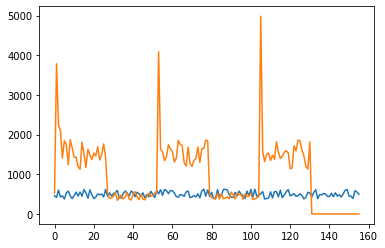

In [215]:
# test that demand_phone_line generates the desired demand graph
plt.plot(demand_phone_line(500, 0, 156, 0))
plt.plot(demand_phone_line(500, 0, 156, 1))

In [216]:
#now combine and generate combined array
def productTimeDataSingular(avg_demand_per_week, median_shortage_cost, offset, num_periods):
    short = shortage_cost(median_shortage_cost, offset, num_periods)

    demand = demand_phone_line(avg_demand_per_week, offset, num_periods)

    return_np_array = np.stack((short, demand), axis = -1)
    return return_np_array
#now make all the products by randomizing the offsets 
##### PRODUCT TIME DATA STILL NOT DONE
def ProductTimeData(low_demand=600000, low_shortage_cost=400, low_offset_lb=-(num_periods / 2) - 1, low_offset_hb=0, 
                    high_demand=1200000, high_shortage_cost=800, high_offset_lb=0, high_offset_hb=num_periods / 2, 
                    num_periods=num_periods, num_products=num_products, num_products_low=num_products / 2):
    # idea is that there are old products, and new products. let's generate some products 
    #that will have negative offsets and low shortage costs
    return_array_1 = []

    for product in range(num_products):
        if product < num_products_low:  #ie. the old demand products
            rand_offset = np.random.randint(low_offset_lb, low_offset_hb)
            sing_data = productTimeDataSingular(low_demand, low_shortage_cost, rand_offset, num_periods)
        else:
            rand_offset = np.random.randint(high_offset_lb, high_offset_hb)
            sing_data = productTimeDataSingular(high_demand, high_shortage_cost, rand_offset, num_periods)
        return_array_1.append(sing_data)
    return_array_1 = np.stack(return_array_1, axis = 0)
    return_array_2 = [[i for i in range(num_periods)] for j in range(num_products)]
    #return return_array_1
    for p in range(num_products):
        cumulative_demand_for_prod = 0
        for t in range(num_periods): 
            # ARRAY FORMAT:d 
            # [ SHORTAGE COST, DEMAND ]
            #want to take demand and multiply by t + 1 as this represents cumulative demand
            if t == 0:
                cumulative_demand = return_array_1[p][t][1]
            else: 
                cumulative_demand = return_array_1[p][t][1] + cumulative_demand_for_prod
            cumulative_demand_for_prod = cumulative_demand
            list_fill = np.array([return_array_1[p][t][0], cumulative_demand])
            return_array_2[p][t] = tuple_builder(list_fill)
    
    print("producttimedata = ", str(return_array_2).replace("'","").replace(", <",",\n <").replace(", [<", ", \n\n[<") + ";")




## COPY PASTE THE OUTPUT FROM THIS FOLLOWING FUNCTION INTO YOUR "productionchangeover.dat" file

In [217]:
def print_all_data():
    beginning_params()
    total_area()
    max_line_changes()
    ProductFactoryData()
    ProductTimeData()
    ProductProductFactoryData()
print_all_data()

Products = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12};
Factories = {1, 2, 3, 4, 5};
Periods = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52};
num_factories = 5;
num_products = 12;
num_periods = 52;
total_area = [5596228 4059552 6513874 3916217 6666629] ;
max_line_changes = [[16 14 13 13 17 12 12 15 16 15 11 16 17 12 11 11 14 12 12 17 15 14 13 13
  13 12 11 12 13 11 16 14 12 12 14 13 17 11 12 12 15 11 11 13 11 14 15 13
  17 15 15 14]
 [15 17 14 17 17 15 15 15 14 16 14 12 15 13 11 14 14 11 11 15 12 12 14 13
  16 12 16 17 14 12 14 13 16 12 15 14 16 11 14 16 15 11 16 11 14 16 16 15
  13 15 13 14]
 [13 14 13 12 11 15 13 17 14 15 11 11 13 15 16 15 11 12 16 14 14 15 13 17
  16 15 17 13 14 14 12 12 15 15 11 15 13 13 13 13 16 15 15 13 13 11 17 11
  17 11 14 12]
 [11 16 13 11 11 14 11 15 12 13 16 12 12 13 13 11 12 13 15 11 12 17 13 13
  11 16 13 16